# zz

In [1]:
zs = 0.53

sehirler=["Adana", "Adıyaman", "Afyon", "Ağrı", "Amasya", "Ankara", "Antalya", "Artvin", "Aydın", "Balıkesir", 
          "Bilecik", "Bingöl", "Bitlis", "Bolu", "Burdur", "Bursa", "Çanakkale", "Çankırı", "Çorum", "Denizli", 
          "Diyarbakır", "Edirne", "Elazığ", "Erzincan", "Erzurum", "Eskişehir", "Gaziantep", "Giresun", "Gümüşhane", 
          "Hakkari", "Hatay", "Isparta", "Mersin", "İstanbul", "İzmir", "Kars", "Kastamonu", "Kayseri", "Kırklareli", 
          "Kırşehir", "Kocaeli", "Konya", "Kütahya", "Malatya", "Manisa", "Kahramanmaraş", "Mardin", "Muğla", "Muş", 
          "Nevşehir", "Niğde", "Ordu", "Rize", "Sakarya", "Samsun", "Siirt", "Sinop", "Sivas", "Tekirdağ", "Tokat", 
          "Trabzon", "Tunceli", "Şanlıurfa", "Uşak", "Van", "Yozgat", "Zonguldak", "Aksaray", "Bayburt", "Karaman", 
          "Kırıkkale", "Batman", "Şırnak", "Bartın", "Ardahan", "Iğdır", "Yalova", "Karabük", "Kilis", "Osmaniye", "Düzce"]

for i in range(len(sehirler)):
    sehirler[i] = sehirler[i].lower()
    sehirler[i] = sehirler[i].replace('i̇','i')

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import mode

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### accuracy_calculate function

In [3]:
def accuracy_calculate(actual_values, predicted_values):

  comparison = abs(np.round(predicted_values) - actual_values)
  accuracy = 1- ((len(comparison[comparison>=(0+1)])) / len(actual_values))

  return accuracy

#### mean_iou_calculator function

In [4]:
def mean_iou_calculator(actual_values, predicted_values, time):
  confusion_array = confusion_matrix(actual_values, predicted_values)
  individual_ious = []
  for i in range(len(confusion_array)):
    individual_iou = confusion_array[i][i] / (sum(confusion_array[i]))
    individual_ious.append(individual_iou)
  mean_iou = sum(individual_ious)/len(individual_ious)
  results = pd.DataFrame()  
  featue_y_values = sorted(data[time].unique())
  for i in range(len(individual_ious)):
    results.insert(0, 'iou_(' + str(featue_y_values[i])  +')', [individual_ious[i]], True)
  results = results[results.columns[::-1]]
  results.insert(0, 'mean_iou', mean_iou, True)
  return results

# Start

In [5]:
data = pd.read_csv('kumassa_son.csv', sep=';', encoding = "utf8")
data.columns = ['product', 'thickness', 'amount', 'company', 'type', 'town', 'order date', 'delivery date', 'time'] #Rearannge the dataframe as the old one

data2 = data.drop('delivery date', axis = 1)
data2["order day"] = ''
data2["order month"] = ''
data2["week day"] = ''


# Remove 'order date' and add 'order day', 'order month' and 'week day' features
for i in range(len(data2)):
  data2.at[i, 'order day'] = data2['order date'][i].split()[0]
  data2.at[i, 'order month'] = data2['order date'][i].split()[1]
  data2.at[i, 'week day'] = data2['order date'][i].split()[-1]
data2 = data2.drop('order date', axis = 1)
data2['week day'] = data2['week day'].str.replace('Pazartesi','pts')
data2['week day'] = data2['week day'].str.replace('Salı','sal')
data2['week day'] = data2['week day'].str.replace('Çarşamba','çrş')
data2['week day'] = data2['week day'].str.replace('Perşembe','prş')
data2['week day'] = data2['week day'].str.replace('Cumartesi','cts')
data2['week day'] = data2['week day'].str.replace('Cuma','cum')
data2['week day'] = data2['week day'].str.replace('Pazar','paz')

#data2 = data2[data2["week day"].str.contains("Pazar") == False]

# Rearranging Dataframe
data2 = data2[['product', 'thickness', 'company', 'amount', 'type', 'town', 'order day', 'week day', 'order month', 'time']]
data2['town'] = data2['town'].str.lower()
data2['town'] = data2['town'].str.replace('i̇','i')
data2['town'] = data2['town'].str.replace('.','missing')
data2['town'] = data2['town'].str.replace(' tekirdağ','tekirdağ')
data2['town'] = data2['town'].str.replace('küçükçekmece','istanbul')
data2['town'] = data2['town'].str.replace('çorlu','tekirdağ')
data2['town'] = data2['town'].str.replace('bandirma','balıkesir')


####################### NEW: ONLY TYPE 0 

# data2.drop(data2[data2.type == 1].index, inplace=True)
# data2 = data2.drop('type',axis = 1).reset_index(drop=True)

#######################

#data2 = data2.drop('town',axis = 1).reset_index(drop=True)
data2 = data2.drop('order day',axis = 1).reset_index(drop=True)
data2 = data2.drop('order month',axis = 1).reset_index(drop=True)
data2 = data2.fillna("missing")
#data2 = data2[data2["town"].str.contains("missing") == False]

data2 = data2.astype({"product": str, "thickness": str, "amount": int})
data2['product'] = 'p' + data2['product']
data2['type'] = 't' + data2['type'].astype(str)

# lss = data2["product"].unique().tolist()
# for prd in lss:
#     data2['product'] = data2['product'].str.replace(".",'')
    
data_start = data2.copy()
data_clean = data2.copy()
drop_df = data2.copy()
drop_index_list = []

data2

,product,thickness,company,amount,type,town,week day,time
0,p3,318.0,S0069,26,t1,istanbul,çrş,3
1,p3,318.0,S1307,51,t1,istanbul,cum,1
2,p3,318.0,S1405,110,t1,istanbul,sal,1
3,p3,318.0,S1130,81,t1,istanbul,prş,1
4,p6,2.0,S1130,46,t2,istanbul,sal,14
...,...,...,...,...,...,...,...,...
2194,p17222,316.0,S3126,51,t20,bursa,prş,28
2195,p17222,316.0,S3126,605,t20,bursa,sal,25
2196,p17222,316.0,S3126,226,t20,bursa,sal,22
2197,p17222,316.0,S3126,558,t20,bursa,sal,15


# Remove insufficient data

In [6]:
def remove_insuff(df, ft):
    print("removing insufficient data for ", ft, "...")
    fst_len = len(df)
    x = df[ft].value_counts() < 3 
    df2 = x.to_frame().reset_index()
    df2.columns = [ft, 'booly']
    df2.drop(df2[df2.booly == False].index, inplace=True)
    drop_list = df2[ft].tolist()
    drop_indices=[]

    if len(drop_list) != 0:
        for i in df.index:
            for j in range(len(drop_list)):
                if (drop_list[j] == df.at[i, ft]):
                    drop_indices = drop_indices + [i]
        df.drop(drop_indices, inplace=True)
        
    else:
        drop_indices = []
                        
    lst_len = len(df)
    rem = fst_len - lst_len      # number of removed data
    per = (rem / fst_len) * 100  # percentage of removed data

    print("total number of removed data: ", rem)
    print("persentage of removed data: ", round(per, 2), "%")
    return df, drop_indices

In [7]:
data2, drop_indices = remove_insuff(data2, "company")
drop_index_list = drop_index_list + drop_indices

data2, drop_indices = remove_insuff(data2, "product")
drop_index_list = drop_index_list + drop_indices

removing insufficient data for  company ...
total number of removed data:  89
persentage of removed data:  4.05 %
removing insufficient data for  product ...
total number of removed data:  472
persentage of removed data:  22.37 %


In [8]:
data_suf = data2.copy()

n_prod = data_suf["product"].nunique()
prod_list = data_suf["product"].unique()
n_comp = data_suf["company"].nunique()
comp_list = data_suf["company"].unique()

In [9]:
data_suf = data2.copy()

# One - Hot - Encoding

In [10]:
def one_hot(df, ft):      ### ft = "company", "product", "week day" etc.
    print("one hot encoding ", ft, "...")
    dum = pd.get_dummies(df[ft])
    df = df.drop(ft, axis = 1)
    df = df.join(dum)
    print(ft, "encoded.")
    return df

In [11]:
data2  = one_hot(data2, "week day")
data2  = one_hot(data2, "company")
data2  = one_hot(data2, "product")
data2  = one_hot(data2, "type")
data2  = one_hot(data2, "thickness")
data2

one hot encoding  week day ...
week day encoded.
one hot encoding  company ...
company encoded.
one hot encoding  product ...
product encoded.
one hot encoding  type ...
type encoded.
one hot encoding  thickness ...
thickness encoded.


,amount,town,time,cts,cum,paz,prş,pts,sal,çrş,...,621.0,638.0,65.0,653.0,762.0,823.0,835.0,87.0,882.0,90.0
0,26,istanbul,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,51,istanbul,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,110,istanbul,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,81,istanbul,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,31,istanbul,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,26,bursa,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2194,51,bursa,28,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2195,605,bursa,25,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2196,226,bursa,22,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data2

,amount,town,time,cts,cum,paz,prş,pts,sal,çrş,...,621.0,638.0,65.0,653.0,762.0,823.0,835.0,87.0,882.0,90.0
0,26,istanbul,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,51,istanbul,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,110,istanbul,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,81,istanbul,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,31,istanbul,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,26,bursa,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2194,51,bursa,28,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2195,605,bursa,25,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2196,226,bursa,22,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Train - Test Split

In [13]:
from sklearn.model_selection import train_test_split

df4 = data2
x_train, x_val = train_test_split(df4, test_size = 0.3, random_state = 40)

# Clean noise

In [14]:
def clean_noise(df): # df = x_train/x_test
    in_len = len(df)
        
    print("Cleaning noise ... ")
    
    index_drop_list = []
    for prod in prod_list:

        df_max_scaled = df[df[prod] == 1].copy()

        for comp in comp_list:
            df_max_scaled2 = df_max_scaled[df_max_scaled[comp] == 1].copy()

            if len(df_max_scaled2) > 1:
                
                max_min_t = df_max_scaled2["time"].max() - df_max_scaled2["time"].min()
                max_min_a = df_max_scaled2["amount"].max() - df_max_scaled2["amount"].min()
                
                if (max_min_a != 0) and (max_min_t != 0):
                    df_max_scaled2["time"] = (df_max_scaled2["time"] - df_max_scaled2["time"].min()) / max_min_t
                    t_sc = df_max_scaled2[["time"]]
                    df_zscore_t = (t_sc - t_sc.mean())/t_sc.std()
                    dfz_t = abs(df_zscore_t) > zs

                    df_max_scaled2["amount"] = (df_max_scaled2["amount"] - df_max_scaled2["amount"].min()) / max_min_a
                    amo_sc = df_max_scaled2["amount"]
                    df_zscore_a = (amo_sc - amo_sc.mean())/amo_sc.std()
                    dfz_a = abs(df_zscore_a) > zs

                    df1 = dfz_t["time"] & dfz_a 
                    df2 = (df_zscore_t["time"] * df_zscore_a) < 0 
                    dfz = df1 & df2 

                    index_drop_list = index_drop_list + [*filter(dfz.get, dfz.index)]

    index_drop_list = sorted(list(set(index_drop_list)))
    df.drop(index_drop_list, axis=0, inplace=True)
    rem = len(index_drop_list)
    f_len = len(df)
    n_del = in_len - f_len
    per = (n_del / in_len) * 100
    
    print("deleted indices: ",index_drop_list)
    print("total number of removed data: ", n_del)
    print("persentage of removed data: ", round(per, 2), "%")
    
    return df, index_drop_list
    

In [15]:
pd.options.mode.chained_assignment = None

x_train, train_drop_list = clean_noise(x_train)
x_val, val_drop_list = clean_noise(x_val)

Cleaning noise ... 
deleted indices:  [10, 40, 41, 53, 54, 62, 65, 68, 77, 91, 105, 108, 149, 152, 153, 154, 172, 174, 175, 221, 227, 228, 233, 240, 241, 267, 269, 303, 396, 397, 405, 407, 411, 412, 423, 427, 429, 478, 479, 487, 488, 491, 493, 496, 497, 501, 502, 527, 531, 541, 545, 560, 566, 567, 572, 605, 607, 612, 615, 619, 627, 639, 646, 652, 698, 699, 702, 706, 708, 719, 725, 727, 738, 739, 741, 771, 803, 804, 818, 840, 844, 864, 865, 894, 905, 908, 909, 921, 922, 923, 930, 931, 933, 934, 936, 937, 938, 939, 964, 965, 970, 992, 999, 1004, 1007, 1017, 1018, 1039, 1041, 1061, 1063, 1087, 1090, 1097, 1098, 1117, 1119, 1132, 1135, 1139, 1142, 1154, 1157, 1165, 1170, 1184, 1185, 1274, 1309, 1310, 1313, 1315, 1341, 1351, 1368, 1369, 1394, 1467, 1468, 1584, 1585, 1600, 1603, 1674, 1701, 1702, 1723, 1726, 1736, 1763, 1783, 1790, 1827, 1909, 1936, 1954, 1959, 1960, 1965, 1991, 1993, 1994, 2004, 2037, 2042, 2046, 2047, 2049, 2055, 2072, 2096, 2098, 2105, 2122, 2125, 2131, 2146, 2152, 2154, 

In [16]:
data2.drop(train_drop_list, axis=0, inplace=True)
data2.drop(val_drop_list, axis=0, inplace=True)

# Drop_df

In [17]:
drop_index_list = sorted(list(set(drop_index_list)))
drop_df = drop_df.loc[drop_index_list]
drop_df

,product,thickness,company,amount,type,town,week day,time
4,p6,2.0,S1130,46,t2,istanbul,sal,14
13,p13,90.0,S9759,20,t1,istanbul,sal,1
19,p15,90.0,S0564,56,t1,istanbul,pts,3
20,p15,90.0,S1130,30,t1,istanbul,cum,1
23,p17,90.0,S0194,28,t1,istanbul,sal,1
...,...,...,...,...,...,...,...,...
2185,p17018,522.0,S0107,48,t2,istanbul,sal,17
2186,p17032,767.0,S1043,37,t12,missing,cum,6
2187,p1708,139.0,S1130,28,t2,istanbul,cum,3
2188,p17081,1.04,S1336,40,t194,istanbul,cum,5


In [18]:
data_clean.drop(drop_df.index.to_list(), axis=0, inplace=True)
data_clean

,product,thickness,company,amount,type,town,week day,time
0,p3,318.0,S0069,26,t1,istanbul,çrş,3
1,p3,318.0,S1307,51,t1,istanbul,cum,1
2,p3,318.0,S1405,110,t1,istanbul,sal,1
3,p3,318.0,S1130,81,t1,istanbul,prş,1
5,p12,90.0,S1130,31,t2,istanbul,pts,4
...,...,...,...,...,...,...,...,...
2193,p17222,316.0,S3126,26,t20,bursa,prş,4
2194,p17222,316.0,S3126,51,t20,bursa,prş,28
2195,p17222,316.0,S3126,605,t20,bursa,sal,25
2196,p17222,316.0,S3126,226,t20,bursa,sal,22


# Drop town column

In [19]:
x_train = x_train.drop('town',axis = 1).reset_index(drop=True)
x_val = x_val.drop('town',axis = 1).reset_index(drop=True)

# Map time

In [20]:
def map_time(df):
    for i in df.index:
#     if (x_train.at[i, "time"]>=8):
#         x_train.at[i, "time"] = 8
    
        if ((df.at[i, "time"]<=4) and (df.at[i, "time"]>=3)):
            df.at[i, "time"] = 4
        elif ((df.at[i, "time"]<=7) and (df.at[i, "time"]>=5)):
            df.at[i, "time"] = 7
        elif ((df.at[i, "time"]<=14) and (df.at[i, "time"]>=8)):
            df.at[i, "time"] = 11
        elif ((df.at[i, "time"]<=30) and (df.at[i, "time"]>=15)):
            df.at[i, "time"] = 20
        elif (df.at[i, "time"]>30):
            df.at[i, "time"] = 35

In [21]:
map_time(x_train)
map_time(x_val)

# Construct y_train & y_val

In [22]:
y_train = x_train["time"].copy().to_frame()
x_train.drop("time", axis=1, inplace=True)

y_val = x_val["time"].copy().to_frame()
x_val.drop("time", axis=1, inplace=True)

y_train = y_train.squeeze(axis=1)
y_val = y_val.squeeze(axis=1)

y_val = y_val.to_list()

# Normalize amount

In [23]:
xt_min = x_train["amount"].min()
xt_max = x_train["amount"].max()

x_train["amount"] = (x_train["amount"] - xt_min) / (xt_max - xt_min)
x_val["amount"] = (x_val["amount"] - xt_min) / (xt_max - xt_min)

# Create a df_empty with the same columns of x_train 

In [24]:
df_empty = x_train[0:0]
df_empty

,amount,cts,cum,paz,prş,pts,sal,çrş,S0001,S0034,...,621.0,638.0,65.0,653.0,762.0,823.0,835.0,87.0,882.0,90.0


In [150]:
x_train

array([[ 0.84642139,  0.17891001, -0.33478541, ...,  0.00730628,
        -0.00696949,  0.0025683 ],
       [ 0.62942483, -0.11151577, -0.40914959, ...,  0.01646206,
         0.0147426 ,  0.00169435],
       [-0.72934601, -0.68264446, -0.04857379, ..., -0.02129954,
        -0.01217245,  0.01800864],
       ...,
       [ 0.98436084,  0.16794752, -0.39813527, ...,  0.0096507 ,
         0.00672577, -0.00604423],
       [ 0.53025069,  0.31503868,  0.50824166, ..., -0.10270013,
         0.17520361, -0.12186872],
       [-0.56282218,  1.47836466,  0.63480033, ...,  0.01122455,
         0.00467821, -0.00626996]])

# PCA

In [25]:
from sklearn.decomposition import PCA
xl = len(x_train.columns)
pca = PCA(.95)
pca.fit(x_train)
print("number of features dropped from ", xl, " to ", pca.n_components_) 
#print("variance ratio: ", pca.explained_variance_ratio_) 

x_train = pca.transform(x_train)
x_val = pca.transform(x_val)

number of features dropped from  231  to  65


In [ ]:
x_train

# SMOTE

#### SMOTENC

In [26]:
from imblearn.over_sampling import SMOTENC
from collections import Counter

print(f'Original dataset shape {x_train.shape}')
print(f'Original dataset samples per class {Counter(y_train)}')

# simulate the 2 last columns to be categorical features
fts = np.arange(1, pca.n_components_, 1, dtype=int)

sm = SMOTENC(random_state=42, categorical_features=fts)
X_res, y_res = sm.fit_resample(x_train, y_train)
print(f'Resampled dataset samples per class {Counter(y_res)}')
print(f'Resampled dataset shape {X_res.shape}')

Original dataset shape (964, 65)
Original dataset samples per class Counter({11: 258, 20: 243, 7: 144, 4: 122, 35: 82, 1: 75, 2: 40})
Resampled dataset samples per class Counter({20: 258, 11: 258, 1: 258, 7: 258, 35: 258, 2: 258, 4: 258})
Resampled dataset shape (1806, 65)


#### SMOTEENN

In [27]:
# from imblearn.combine import SMOTEENN 
# from collections import Counter
# print('Original dataset shape %s' % Counter(y_train))

# sme = SMOTEENN(random_state=42)
# X_res, y_res = sme.fit_resample(x_train, y_train)
# print('Resampled dataset shape %s' % Counter(y_res))

In [28]:
x_train = X_res
y_train = y_res

# Results

### Train

In [29]:
random_state = 42
kernel = 1.0 * RBF(1.0)

Logistic_Regression = LogisticRegression(random_state= random_state, max_iter = 1000).fit(x_train, y_train.astype('int'))
#linearReg = LinearRegression().fit(x_train, y_train.astype('int'))
rndmForest = RandomForestClassifier(n_estimators=1000, class_weight="balanced", n_jobs=-1, min_samples_leaf=2, max_depth=5,
                                    random_state=random_state).fit(x_train, y_train.astype('int'))
                                                                   
#MLP = MLPClassifier(random_state=1, max_iter=5000).fit(x_train, y_train.astype('int'))

#Finding k value fom max accuracy
k_values=[]
for k in range(1, 51):
    KNeighbors = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train.astype('int'))
    KNeighbors_predictions = KNeighbors.predict(x_val)
    k_values.append(accuracy_calculate(y_val, KNeighbors_predictions))
k_max = k_values.index(max(k_values)) + 1

KNeighbors = KNeighborsClassifier(n_neighbors=k_max).fit(x_train, y_train.astype('int'))
CSupportVector = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(x_train, y_train.astype('int'))
DecisionTtree = DecisionTreeClassifier(random_state=0).fit(x_train, y_train.astype('int'))
# GaussianProcess = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(x_train, y_train.astype('int'))
# AdaBoost = AdaBoostClassifier(n_estimators=1000, random_state=0).fit(x_train, y_train.astype('int'))
# GaussianNaiveBayes = GaussianNB().fit(x_train, y_train.astype('int'))
# QuadraticDiscriminantAnalysis = QuadraticDiscriminantAnalysis().fit(x_train, y_train.astype('int'))


LogisticRegression_predictions = Logistic_Regression.predict(x_train)
#linearReg_predictions = linearReg.predict(x_val)
rndmForest_predictions = rndmForest.predict(x_train)
#MLP_predictions = MLP.predict(x_val)
KNeighbors_predictions = KNeighbors.predict(x_train)
CSupportVector_predictions = CSupportVector.predict(x_train)
DecisionTtree_predictions = DecisionTtree.predict(x_train)
# GaussianProcess_predictions = GaussianProcess.predict(x_val)
# AdaBoost_predictions = AdaBoost.predict(x_val)
# GaussianNaiveBayes_predictions = GaussianNaiveBayes.predict(x_val)
# QuadraticDiscriminantAnalysis_predictions = QuadraticDiscriminantAnalysis.predict(x_val)


print('Accuracy of LogisticRegression classifier: ', accuracy_calculate(y_train, LogisticRegression_predictions))
#print('Accuracy of LinearRegression classifier: ', accuracy_calculate(y_val, linearReg_predictions))
print('Accuracy of RandomForest classifier: ', accuracy_calculate(y_train, rndmForest_predictions))
#print('Accuracy of Multi-layer Perceptron classifier: ', accuracy_calculate(y_val, MLP_predictions))
print('Accuracy of KNeighbors classifier: ', accuracy_calculate(y_train, KNeighbors_predictions))
print('Accuracy of CSupportVector classifier: ', accuracy_calculate(y_train, CSupportVector_predictions))
print('Accuracy of DecisionTtree classifier: ', accuracy_calculate(y_train, DecisionTtree_predictions))
#print('Accuracy of GaussianProcess classifier: ', accuracy_calculate(y_val, GaussianProcess_predictions))
#print('Accuracy of AdaBoost classifier: ', accuracy_calculate(y_val, AdaBoost_predictions))
#print('Accuracy of GaussianNaiveBayes classifier: ', accuracy_calculate(y_val, GaussianNaiveBayes_predictions))
#print('Accuracy of QuadraticDiscriminantAnalysis classifier: ', accuracy_calculate(y_val, QuadraticDiscriminantAnalysis_predictions))

Accuracy of LogisticRegression classifier:  0.6018826135105204
Accuracy of RandomForest classifier:  0.7491694352159468
Accuracy of KNeighbors classifier:  0.9817275747508306
Accuracy of CSupportVector classifier:  0.7314507198228128
Accuracy of DecisionTtree classifier:  0.9839424141749723


#### Balanced Accuracy / train

In [30]:
print('Balanced_Accuracy of LogisticRegression classifier: ', balanced_accuracy_score(y_train, LogisticRegression_predictions))
print('Balanced_Accuracy of RandomForest classifier: ', balanced_accuracy_score(y_train, rndmForest_predictions))
print('Balanced_Accuracy of KNeighbors classifier: ', balanced_accuracy_score(y_train, KNeighbors_predictions))
print('Balanced_Accuracy of CSupportVector classifier: ', balanced_accuracy_score(y_train, CSupportVector_predictions))
print('Balanced_Accuracy of DecisionTtree classifier: ', balanced_accuracy_score(y_train, DecisionTtree_predictions))

Balanced_Accuracy of LogisticRegression classifier:  0.6018826135105204
Balanced_Accuracy of RandomForest classifier:  0.7491694352159468
Balanced_Accuracy of KNeighbors classifier:  0.9817275747508305
Balanced_Accuracy of CSupportVector classifier:  0.7314507198228128
Balanced_Accuracy of DecisionTtree classifier:  0.9839424141749723


In [31]:
### DENİYOZ#################################################################

In [32]:
DecisionTtree = DecisionTreeClassifier(random_state=0, criterion='gini', min_samples_leaf=3, max_depth=20).fit(x_train, y_train.astype('int'))
DecisionTtree_predictions = DecisionTtree.predict(x_train)
print('Accuracy of DecisionTtree_predictions : ', accuracy_calculate(y_train, DecisionTtree_predictions))
print('Balanced_Accuracy of DecisionTtree_predictions : ', balanced_accuracy_score(y_train, DecisionTtree_predictions))

DecisionTtree_predictions = DecisionTtree.predict(x_val)
print('Accuracy of DecisionTtree_predictions : ', accuracy_calculate(y_val, DecisionTtree_predictions))
print('Balanced_Accuracy of DecisionTtree_predictions : ', balanced_accuracy_score(y_val, DecisionTtree_predictions))



Accuracy of DecisionTtree_predictions :  0.8615725359911406
Balanced_Accuracy of DecisionTtree_predictions :  0.8615725359911405
Accuracy of DecisionTtree_predictions :  0.431980906921241
Balanced_Accuracy of DecisionTtree_predictions :  0.3937865711286851


In [33]:
Logistic_Regression = LogisticRegression(class_weight="balanced", multi_class="ovr", random_state= random_state, max_iter = 1000).fit(x_train, y_train.astype('int'))
LogisticRegression_predictions = Logistic_Regression.predict(x_train)
print('Accuracy of LogisticRegression classifier: ', accuracy_calculate(y_train, LogisticRegression_predictions))
print('Balanced_Accuracy of LogisticRegression classifier: ', balanced_accuracy_score(y_train, LogisticRegression_predictions))

# LogisticRegression_predictions = Logistic_Regression.predict(x_val)
# print('Accuracy of LogisticRegression classifier: ', accuracy_calculate(y_val, LogisticRegression_predictions))
# print('Balanced_Accuracy of LogisticRegression classifier: ', balanced_accuracy_score(y_val, LogisticRegression_predictions))


Accuracy of LogisticRegression classifier:  0.5913621262458472
Balanced_Accuracy of LogisticRegression classifier:  0.591362126245847


In [34]:
svm = SGDClassifier(loss='log',class_weight="balanced", max_iter=2000).fit(x_train, y_train)
predictions = svm.predict(x_val)
print("accuracy: ",accuracy_score(predictions, y_val))
print("accuracy: ",balanced_accuracy_score(predictions, y_val))

accuracy:  0.4105011933174224
accuracy:  0.3807627104493064


In [35]:
###############################################################

#### LogisticRegression / train

balanced_accuracy:  0.591362126245847
accuracy:  0.5913621262458472
precision:  0.5851238181382854
recall:  0.5913621262458472
f1 score:  0.5872210782071714


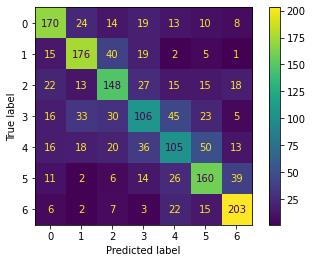

In [36]:
print("balanced_accuracy: ",balanced_accuracy_score(y_train, LogisticRegression_predictions))
print("accuracy: ",accuracy_score(y_train, LogisticRegression_predictions))
print("precision: ",precision_score(y_train, LogisticRegression_predictions,average='weighted'))
print("recall: ",recall_score(y_train, LogisticRegression_predictions,average='weighted'))
print("f1 score: ",f1_score(y_train, LogisticRegression_predictions,average='weighted'))

cm = confusion_matrix(y_train, LogisticRegression_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [37]:
mean_iou_calculator(y_train, LogisticRegression_predictions, "time")

,mean_iou,iou_(1),iou_(2),iou_(3),iou_(4),iou_(5),iou_(6),iou_(7)
0,0.591362,0.658915,0.682171,0.573643,0.410853,0.406977,0.620155,0.786822


#### RandomForestClassifier / train

balanced_accuracy:  0.7491694352159468
accuracy:  0.7491694352159468
precision:  0.759779289105998
recall:  0.7491694352159468
f1 score:  0.7448338938731769


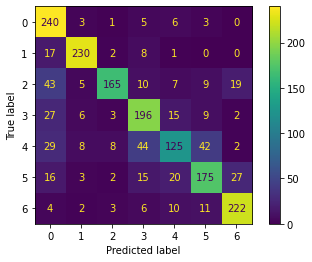

In [38]:
print("balanced_accuracy: ",balanced_accuracy_score(y_train, rndmForest_predictions))
print("accuracy: ",accuracy_score(y_train, rndmForest_predictions))
print("precision: ",precision_score(y_train, rndmForest_predictions,average='weighted'))
print("recall: ",recall_score(y_train, rndmForest_predictions,average='weighted'))
print("f1 score: ",f1_score(y_train, rndmForest_predictions,average='weighted'))

cm = confusion_matrix(y_train, rndmForest_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [39]:
mean_iou_calculator(y_train, rndmForest_predictions, "time")

,mean_iou,iou_(1),iou_(2),iou_(3),iou_(4),iou_(5),iou_(6),iou_(7)
0,0.749169,0.930233,0.891473,0.639535,0.75969,0.484496,0.678295,0.860465


#### KNeighborsClassifier  / train

balanced_accuracy:  0.9817275747508305
accuracy:  0.9817275747508306
precision:  0.9821334099755074
recall:  0.9817275747508306
f1 score:  0.9817869344251062


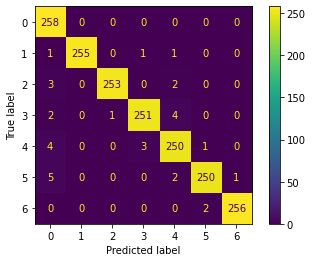

In [40]:
print("balanced_accuracy: ",balanced_accuracy_score(y_train, KNeighbors_predictions))
print("accuracy: ",accuracy_score(y_train, KNeighbors_predictions))
print("precision: ",precision_score(y_train, KNeighbors_predictions,average='weighted'))
print("recall: ",recall_score(y_train, KNeighbors_predictions,average='weighted'))
print("f1 score: ",f1_score(y_train, KNeighbors_predictions,average='weighted'))

cm = confusion_matrix(y_train, KNeighbors_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [41]:
mean_iou_calculator(y_train, rndmForest_predictions, "time")

,mean_iou,iou_(1),iou_(2),iou_(3),iou_(4),iou_(5),iou_(6),iou_(7)
0,0.749169,0.930233,0.891473,0.639535,0.75969,0.484496,0.678295,0.860465


#### CSupportVector  / train

balanced_accuracy:  0.7314507198228128
accuracy:  0.7314507198228128
precision:  0.7269441038616183
recall:  0.7314507198228128
f1 score:  0.7277254726591166


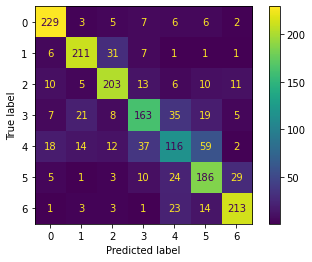

In [42]:
print("balanced_accuracy: ",balanced_accuracy_score(y_train, CSupportVector_predictions))
print("accuracy: ",accuracy_score(y_train, CSupportVector_predictions))
print("precision: ",precision_score(y_train, CSupportVector_predictions,average='weighted'))
print("recall: ",recall_score(y_train, CSupportVector_predictions,average='weighted'))
print("f1 score: ",f1_score(y_train, CSupportVector_predictions,average='weighted'))

cm = confusion_matrix(y_train, CSupportVector_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [43]:
mean_iou_calculator(y_train, CSupportVector_predictions, "time")

,mean_iou,iou_(1),iou_(2),iou_(3),iou_(4),iou_(5),iou_(6),iou_(7)
0,0.731451,0.887597,0.817829,0.786822,0.631783,0.449612,0.72093,0.825581


## Test

In [44]:
# # random_state = 42
# # kernel = 1.0 * RBF(1.0)

# # Logistic_Regression = LogisticRegression(random_state= random_state, max_iter = 1000).fit(x_train, y_train.astype('int'))
# # #linearReg = LinearRegression().fit(x_train, y_train.astype('int'))
# # rndmForest = RandomForestClassifier(n_estimators=1000, class_weight="balanced", n_jobs=-1, min_samples_leaf=3, max_depth=5,
# #                                     random_state=random_state).fit(x_train, y_train.astype('int'))
                                                                   
# # #MLP = MLPClassifier(random_state=1, max_iter=5000).fit(x_train, y_train.astype('int'))

# # #Finding k value fom max accuracy
# # k_values=[]
# # for k in range(1, 51):
# #     KNeighbors = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train.astype('int'))
# #     KNeighbors_predictions = KNeighbors.predict(x_val)
# #     k_values.append(accuracy_calculate(y_val, KNeighbors_predictions))

# # k_max = k_values.index(max(k_values)) + 1
# KNeighbors = KNeighborsClassifier(n_neighbors=k_max).fit(x_train, y_train.astype('int'))
# CSupportVector = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(x_train, y_train.astype('int'))
# DecisionTtree = DecisionTreeClassifier(random_state=0).fit(x_train, y_train.astype('int'))
# # GaussianProcess = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(x_train, y_train.astype('int'))
# # AdaBoost = AdaBoostClassifier(n_estimators=1000, random_state=0).fit(x_train, y_train.astype('int'))
# # GaussianNaiveBayes = GaussianNB().fit(x_train, y_train.astype('int'))
# # QuadraticDiscriminantAnalysis = QuadraticDiscriminantAnalysis().fit(x_train, y_train.astype('int'))


LogisticRegression_predictions = Logistic_Regression.predict(x_val)
#linearReg_predictions = linearReg.predict(x_val)
rndmForest_predictions = rndmForest.predict(x_val)
#MLP_predictions = MLP.predict(x_val)
KNeighbors_predictions = KNeighbors.predict(x_val)
CSupportVector_predictions = CSupportVector.predict(x_val)
DecisionTtree_predictions = DecisionTtree.predict(x_val)
# GaussianProcess_predictions = GaussianProcess.predict(x_val)
# AdaBoost_predictions = AdaBoost.predict(x_val)
# GaussianNaiveBayes_predictions = GaussianNaiveBayes.predict(x_val)
# QuadraticDiscriminantAnalysis_predictions = QuadraticDiscriminantAnalysis.predict(x_val)


print('Accuracy of LogisticRegression classifier: ', accuracy_calculate(y_val, LogisticRegression_predictions))
#print('Accuracy of LinearRegression classifier: ', accuracy_calculate(y_val, linearReg_predictions))
print('Accuracy of RandomForest classifier: ', accuracy_calculate(y_val, rndmForest_predictions))
#print('Accuracy of Multi-layer Perceptron classifier: ', accuracy_calculate(y_val, MLP_predictions))
print('Accuracy of KNeighbors classifier: ', accuracy_calculate(y_val, KNeighbors_predictions))
print('Accuracy of CSupportVector classifier: ', accuracy_calculate(y_val, CSupportVector_predictions))
print('Accuracy of DecisionTtree classifier: ', accuracy_calculate(y_val, DecisionTtree_predictions))
#print('Accuracy of GaussianProcess classifier: ', accuracy_calculate(y_val, GaussianProcess_predictions))
#print('Accuracy of AdaBoost classifier: ', accuracy_calculate(y_val, AdaBoost_predictions))
#print('Accuracy of GaussianNaiveBayes classifier: ', accuracy_calculate(y_val, GaussianNaiveBayes_predictions))
#print('Accuracy of QuadraticDiscriminantAnalysis classifier: ', accuracy_calculate(y_val, QuadraticDiscriminantAnalysis_predictions))

Accuracy of LogisticRegression classifier:  0.431980906921241
Accuracy of RandomForest classifier:  0.46778042959427213
Accuracy of KNeighbors classifier:  0.47732696897374705
Accuracy of CSupportVector classifier:  0.45346062052505964
Accuracy of DecisionTtree classifier:  0.431980906921241


In [45]:
# rndmForest = RandomForestClassifier(n_estimators=1000, class_weight="balanced", n_jobs=-1, min_samples_leaf=3, max_depth=5,
#                                     random_state=random_state).fit(x_train, y_train.astype('int'))
# rndmForest_predictions = rndmForest.predict(x_val)
# print('Accuracy of RandomForest classifier: ', accuracy_calculate(y_val, rndmForest_predictions))
# print('Balanced_Accuracy of RandomForest classifier: ', balanced_accuracy_score(y_val, rndmForest_predictions))
# rndmForest_predictions = rndmForest.predict(x_train)
# print('Accuracy of RandomForest classifier: ', accuracy_calculate(y_train, rndmForest_predictions))
# print('Balanced_Accuracy of RandomForest classifier: ', balanced_accuracy_score(y_train, rndmForest_predictions))

#### Balanced Accuracy / test

In [46]:
print('Balanced_Accuracy of LogisticRegression classifier: ', balanced_accuracy_score(y_val, LogisticRegression_predictions))
print('Balanced_Accuracy of RandomForest classifier: ', balanced_accuracy_score(y_val, rndmForest_predictions))
print('Balanced_Accuracy of KNeighbors classifier: ', balanced_accuracy_score(y_val, KNeighbors_predictions))
print('Balanced_Accuracy of CSupportVector classifier: ', balanced_accuracy_score(y_val, CSupportVector_predictions))
print('Balanced_Accuracy of DecisionTtree classifier: ', balanced_accuracy_score(y_val, DecisionTtree_predictions))

Balanced_Accuracy of LogisticRegression classifier:  0.43655237310164813
Balanced_Accuracy of RandomForest classifier:  0.47815809220854805
Balanced_Accuracy of KNeighbors classifier:  0.4216002707470133
Balanced_Accuracy of CSupportVector classifier:  0.4335699882960994
Balanced_Accuracy of DecisionTtree classifier:  0.3937865711286851


#### LogisticRegression

balanced_accuracy:  0.43655237310164813
accuracy:  0.431980906921241
precision:  0.45069809848087405
recall:  0.431980906921241
f1 score:  0.4319867163449527


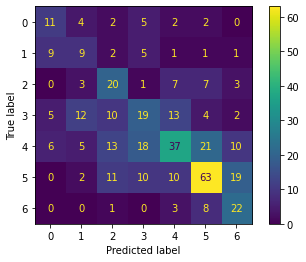

In [47]:
print("balanced_accuracy: ",balanced_accuracy_score(y_val, LogisticRegression_predictions))
print("accuracy: ",accuracy_score(y_val, LogisticRegression_predictions))
print("precision: ",precision_score(y_val, LogisticRegression_predictions,average='weighted'))
print("recall: ",recall_score(y_val, LogisticRegression_predictions,average='weighted'))
print("f1 score: ",f1_score(y_val, LogisticRegression_predictions,average='weighted'))

cm = confusion_matrix(y_val, LogisticRegression_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [48]:
mean_iou_calculator(y_val, LogisticRegression_predictions, "time")

,mean_iou,iou_(1),iou_(2),iou_(3),iou_(4),iou_(5),iou_(6),iou_(7)
0,0.436552,0.423077,0.321429,0.487805,0.292308,0.336364,0.547826,0.647059


#### RandomForestClassifier

balanced_accuracy:  0.47815809220854805
accuracy:  0.4677804295942721
precision:  0.5101970770288198
recall:  0.4677804295942721
f1 score:  0.47090628410470603


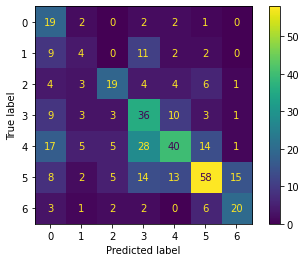

In [49]:
print("balanced_accuracy: ",balanced_accuracy_score(y_val, rndmForest_predictions))
print("accuracy: ",accuracy_score(y_val, rndmForest_predictions))
print("precision: ",precision_score(y_val, rndmForest_predictions,average='weighted'))
print("recall: ",recall_score(y_val, rndmForest_predictions,average='weighted'))
print("f1 score: ",f1_score(y_val, rndmForest_predictions,average='weighted'))

cm = confusion_matrix(y_val, rndmForest_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [50]:
mean_iou_calculator(y_val, rndmForest_predictions, "time")

,mean_iou,iou_(1),iou_(2),iou_(3),iou_(4),iou_(5),iou_(6),iou_(7)
0,0.478158,0.730769,0.142857,0.463415,0.553846,0.363636,0.504348,0.588235


#### KNeighborsClassifier

balanced_accuracy:  0.4216002707470133
accuracy:  0.477326968973747
precision:  0.47721720711744026
recall:  0.477326968973747
f1 score:  0.47507461498094994


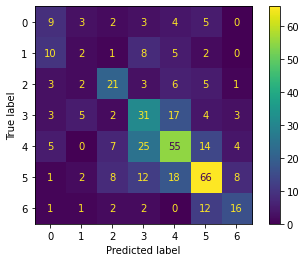

In [51]:
print("balanced_accuracy: ",balanced_accuracy_score(y_val, KNeighbors_predictions))
print("accuracy: ",accuracy_score(y_val, KNeighbors_predictions))
print("precision: ",precision_score(y_val, KNeighbors_predictions,average='weighted'))
print("recall: ",recall_score(y_val, KNeighbors_predictions,average='weighted'))
print("f1 score: ",f1_score(y_val, KNeighbors_predictions,average='weighted'))

cm = confusion_matrix(y_val, KNeighbors_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [52]:
mean_iou_calculator(y_val, KNeighbors_predictions, "time")

,mean_iou,iou_(1),iou_(2),iou_(3),iou_(4),iou_(5),iou_(6),iou_(7)
0,0.4216,0.346154,0.071429,0.512195,0.476923,0.5,0.573913,0.470588


#### CSupportVector

balanced_accuracy:  0.4335699882960994
accuracy:  0.45346062052505964
precision:  0.4591978927447642
recall:  0.45346062052505964
f1 score:  0.4488152345990813


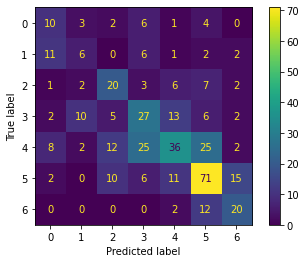

In [53]:
print("balanced_accuracy: ",balanced_accuracy_score(y_val, CSupportVector_predictions))
print("accuracy: ",accuracy_score(y_val, CSupportVector_predictions))
print("precision: ",precision_score(y_val, CSupportVector_predictions,average='weighted'))
print("recall: ",recall_score(y_val, CSupportVector_predictions,average='weighted'))
print("f1 score: ",f1_score(y_val, CSupportVector_predictions,average='weighted'))

cm = confusion_matrix(y_val, CSupportVector_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [54]:
mean_iou_calculator(y_val, CSupportVector_predictions, "time")

,mean_iou,iou_(1),iou_(2),iou_(3),iou_(4),iou_(5),iou_(6),iou_(7)
0,0.43357,0.384615,0.214286,0.487805,0.415385,0.327273,0.617391,0.588235


# input functions

In [135]:
def is_prod_in_data(df):
    prods = df["product"].unique()
    prd = str(input("Product seç: "))
    prd = "p" + prd
    if prd not in prods: 
        print("no")
        return False, prd
    else:
        print("yes")
        return True, prd
    
def is_prod_in_data_drop(df, prd):
    prods = df["product"].unique()
    if prd not in prods: 
        return False
    else:
        return True

In [136]:
def take_input(df, prd):
    amo = input("Amount: ") 
    y = False
    while y == False:
        if (amo.isnumeric() == False):
            print("Pozitif tam sayı değer giriniz")
            amo = input("Amount: ")

        else:
            d = max(df[df["product"] == prd]["amount"].to_list()) * 3
            if int(amo) > d:
                print("Amount yüksek abi emin misin bak !?")
                y_n = input("y / n ?")
                if y_n == "y":
                    y = True
                elif y_n == "n":
                    amo = input("Amount: ")                   
            else:
                y = True
    amo = int(amo)

    w_days = ['pts', 'sal', 'çrş', 'prş', 'cum', 'cts', 'paz']
    print("available 'Week day' list: ", w_days)
    wd = str(input("Week day: "))
    z = False
    while z == False:
        if wd not in w_days:
            print("Geçerli gün giriniz...")
            print("Geçerli günler: ", w_days)
            wd = str(input("Week day: "))
        else:
            z = True
            
    ########## KUMAŞ THICKNESS
    
    t_list = df[df["product"] == prd]["thickness"].to_list()
    t_list = np.unique(np.array(t_list))
    print("available thickness list: ", t_list)
    th = str(input("thickness: "))
    z = False
    while z == False:
        if th not in t_list:
            print("Geçerli thickness giriniz...")
            print("available thickness list: ", t_list)
            th = str(input("thickness: "))
        else:
            z = True
    
    ##############

    typ = df[df["product"] == prd]["type"].unique()[0] 
    comps = df[df["product"] == prd]["company"].unique()
    tws = df[df["product"] == prd]["town"].unique()

    df_inp = pd.DataFrame(columns = ['product', 'thickness', 'amount', 'company','type','town','week day'])

    for comp in comps:
        tw = df[(df["product"] == prd) & (df["company"] == comp)]["town"].unique()[0]

        df_inp = df_inp.append({'product' : prd, 'thickness' : th, 'company' : comp, 'amount' : amo, 'town' : tw,'type' : typ,
                            'week day' : wd}, ignore_index=True)

    return df_inp, comps

# Run

In [140]:
def run():
    c = True
    while c == True:
        tf, prd = is_prod_in_data(data_clean)
        cond1 = False
        
        if tf == True:
            df_inp, comps = take_input(data_clean, prd)
            c = False
            cond1 = True
            return df_inp, cond1
        else:
            if (is_prod_in_data_drop(drop_df, prd) == True):
                print("Güvenilir sonuç için product'a ait en az 5 giriş bulunmalıdır.")
                print("\n","Daha önce bu product alımları: ")
                a = drop_df[drop_df["product"] == prd]
                a = a.index.to_list()
                a = data.loc[a]
                display(a[['company', 'amount', 'town', 'order date', 'delivery date', 'time']].style.hide_index())
                print ("Ortalama miktar = ", a["amount"].mean(), "Ortalama süre = ", a["time"].mean())
                c = False
                return null, cond1
            else:
                print("Product bulunamadı.")

In [143]:
df_inp, cond = run()
if cond:
    display(df_inp)

Product seç: 15652
yes
Amount: 50
available 'Week day' list:  ['pts', 'sal', 'çrş', 'prş', 'cum', 'cts', 'paz']
Week day: pts
available thickness list:  ['1.671']
thickness: 1.671


,product,thickness,amount,company,type,town,week day
0,p15652,1.671,50,S1539,t11,missing,pts


# Input data pre-process

In [122]:
if cond1 == True:
    df_inp  = one_hot(df_inp, "week day")
    df_inp  = one_hot(df_inp, "product")
    df_inp  = one_hot(df_inp, "company")
    df_inp  = one_hot(df_inp, "type")
    df_inp  = one_hot(df_inp, "thickness")

    df_inp = df_inp.drop('town',axis = 1).reset_index(drop=True)

    df_inp["amount"] = (df_inp["amount"] - xt_min) / (xt_max - xt_min)

    df_inp = df_empty.append(df_inp)
    df_inp = df_inp.fillna(0)

    df_inp = pca.transform(df_inp)

one hot encoding  week day ...
week day encoded.
one hot encoding  product ...
product encoded.
one hot encoding  company ...
company encoded.
one hot encoding  type ...
type encoded.
one hot encoding  thickness ...
thickness encoded.


# Predict

#### LogisticRegression

In [123]:
if cond1 == True:
    LR = Logistic_Regression.predict(df_inp)
    LR
    print(LR)

[7]


#### RandomForest

In [124]:
if cond1 == True:
    RF = rndmForest.predict(df_inp)
    RF
    print(RF)

[7]


#### KNeighbors

In [125]:
if cond1 == True:
    KN = KNeighbors.predict(df_inp)
    KN
    print(KN)

[1]


#### CSupportVector

In [126]:
if cond1 == True:
    CSV = CSupportVector.predict(df_inp)
    print(CSV)

[7]


## Collective Result

In [95]:
if cond1 == True:
    res = np.array([])
    output = np.array([])
    for i in range(len(LR)):
        res = np.append(res, [LR[i], RF[i], KN[i], CSV[i]])
        m = mode(res)[0][0]
        output = np.append(output, m)
        res = np.array([])
    output

In [96]:
if cond1 == True:
    for i in range(len(output)):
        print("for company ", comps[i], ", time = ", output[i])

for company  S1539 , time =  7.0


In [131]:
df_inp = 0
del(df_inp)

# AUPRC ??